# Finding the Best Markets to Advertise In

The project is part of learning projects by [Dataquest.io](https://dataquest.io). The project assigment is to find the best markets to advertise in. For the project purposes we assume that we're working for an e-learning company (such as Dataquest), that offers courses on programming. Majority of the offered courses are focused on web and mobile development. The fictional site also offers courses on data science, game development, etc. The company wants to promote their product and would like to invest some money in advertisment. The project goal is to find two best markets to advertise the product in.

To get some market insights we will utilize an existing data set – 2017 New Coder Survey by [freeCodeCamp](https://www.freecodecamp.org). The survey is publicly available on their [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey), with responsese form more than 20,000 developers.

## 1. Exploring the Dataset

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# reading in the datase
survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False) #low_memory = False to silence dtypes warning

# printing data about the dataset
print(survey.shape)
pd.options.display.max_columns = 150 # to avoid truncated output
survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

Conducting stand-alone survey and getting close to 20,000 responses would be really costly. That's why the company is using the opensource dataset. Most of the columns are pretty self explanatory, but some might be harder to underst. The `README.md` file on the GitHub does not provide dataset dictionary. As a workaround we can look at the [raw-data](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/raw-data) to read the questions. Because our company is providng coding courses, we want to focus on a population of new coders interested in the subjects we teach. We are particulary interested in:
- Where are these new coders located
- What are the locations with the greatest number of new coders
- How much money new coders are willing to spend on learning

First we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

## 1.2 Checking Sample Representativity
Figure out whether the sample we have is representative for our population of interest.
The JobRoleInterest column describes for every participant the role(s) they'd be interested in working.
Generate a frequency distribution table for this column. Take percentages instead of absolute frequencies.
Analyze the table.
Are people interested in only one subject or they can be interested in more than one subject?
If most people are interested in more than one subject, is this sample still representative?
The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?
Generate at least one graph while you're working on these steps to help the reader understand easier what you're doing.
Use Markdown cells to explain the readers what you're doing.

In [2]:
# generating frequency table for the `JobRoleInterest` column
survey["JobRoleInterest"].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                              11.770595
  Front-End Web Developer                                                                                                                                                              6.435927
  Data Scientist                                                                                                                                                                       2.173913
Back-End Web Developer                                                                                                                                                                 2.030892
  Mobile Developer                                                                                                                                                                     1.673341
                                        

The data from the frequecy table are rather granular. People can be interested in more than one subject. After a quick scan, we can draw general conslusions:
- at least 20% responders are interested in some kind of web development
- web development trends in the top 5 results
- mobile development is in the top 5 results
- data science is in the top 5 results

So far the data from the survey matches our company needs. We are mainly offering web & mobile development courses. Our other courses on data science is also present with high percentage.

### 1.2.1 Count of Options
Since people can choose from multiple options, let's see how many people choose only option (those have a clear idea what they want to do), and how many choose multiple job roles they are interested in (those do not have a clear idea).

In [3]:
job_role = survey["JobRoleInterest"].dropna()
job_role_split = job_role.str.split(",")

# counting the number of selected options
n_of_options = job_role_split.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

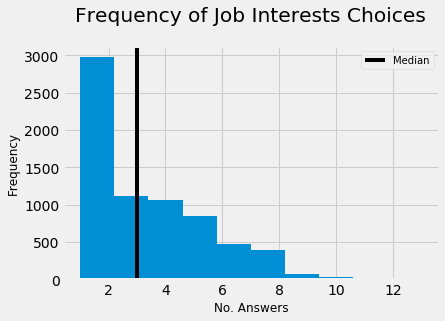

In [4]:
# plotting the results of the frequency table
plt.style.use('fivethirtyeight')
n_of_options.plot.hist(label="_Hidden")
plt.title("Frequency of Job Interests Choices", y=1.08)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("No. Answers", fontsize=12)
plt.axvline(n_of_options.median(), color="Black", label="Median")
plt.legend(fontsize=10)

plt.show()

### 1.2.1 Web And Mobile Development Sample
To further work the data, we will split the answers in the `JobRoleInterest` and count how many times the key words Web Developer or Mobile Developer are present.

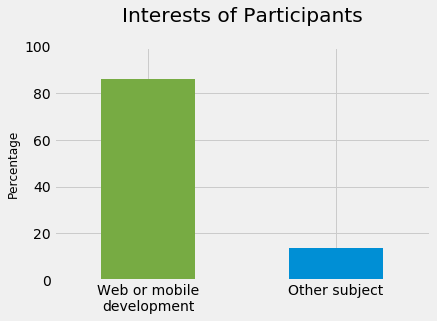

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

In [5]:
web_mobile = job_role.str.contains("Web Developer|Mobile Developer")
web_mobile_freq = web_mobile.value_counts(normalize=True) * 100 

web_mobile_freq.plot.bar(color=["#77AB43","#008FD5"])
plt.title("Interests of Participants", y=1.08)
plt.ylabel("Percentage", fontsize=12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylim([0,100])
plt.show()

web_mobile_freq

From the frequency talbe we see that more than 85% of people who responded to the survey are interested in either Web or Mobile Developemnt. That is a great news for our fictional company since there is a market for our courses. To figure out who are those people and how to target them we need to dig deeper and get answers to:
- where are the learners located,
- what are the locations with the highest number of learners,
- how much money are the learners willing to spend on learning.

## 2. Locations & Densities
The survey provides us with the following informations on locations. `CountryCitizen` variable describes the country of origin for each participant, and the `CountryLive` variable describes what country each participants lives in (may be different than the origin country). For analyzing purposes we will move furhter with the variable `CountryLive` as this the current location of the new coders. We will now proceed to find best two markets from the dataset. By best market we mean a market with relatively high number of potential customers.

In [6]:
survey_clean = survey[survey["JobRoleInterest"].notnull()].copy()

# frequency tables with absolute and relative frequencies
country_abs = survey_clean["CountryLive"].value_counts()
country_rel = survey_clean["CountryLive"].value_counts(normalize=True) * 100

# adding the two tables pd DataFrame
pd.DataFrame(data = {"Absolute Frequency": country_abs, 
                     'Percentage': country_rel}
            )


,Absolute Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Vanuatu,1,0.014624
Gambia,1,0.014624
Kyrgyzstan,1,0.014624
Channel Islands,1,0.014624


More than 45% of our market is located in the USA. Second is India, with 7.7% followed by UK (4.6%) and Canada (3.8%). This might be potentionally interesting information – we could possibly omit India in favor of the third and fourth best market to use the advantage of same language and cultural bacground. Let's see how much money are the new coders willing to spend on their education.

## 3. Willingness to spend money
The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of **$59 per month,** and for this reason we're interested in finding out how much money each student spends per month.

In [7]:
# replacing 0 months programming with 1
survey_clean["MonthsProgramming"].replace(0, 1, inplace=True) 

# how much new coders are spending per month
survey_clean["Monthly_Spending"] = survey_clean["MoneyForLearning"] / survey_clean["MonthsProgramming"]

# number of null spend
survey_clean["Monthly_Spending"].isnull().sum()

675

In [8]:
# keeping only those who spend some ammount
spend_money = survey_clean[survey_clean["Monthly_Spending"].notnull()].copy()

# number of new coders without current country
spend_money["CountryLive"].isnull().sum()

105

In [9]:
# keeping only those learners who have country assigned
spend_money = spend_money[spend_money["CountryLive"].notnull()]

### 3.1 Average Monthly Spending

In [10]:
# grouping the top 4 countries by the mean monthly sum
spend_money.groupby(["CountryLive"]).mean()["Monthly_Spending"][["United States of America", "India", "United Kingdom", "Canada"]]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Monthly_Spending, dtype: float64

Quite surprisingly UK and Canada are actually spending less money on learning than in India. Since the result is bit unexpected let's create box plot to see any outliners.

### 3.2 Monthly Spend: Box Plot

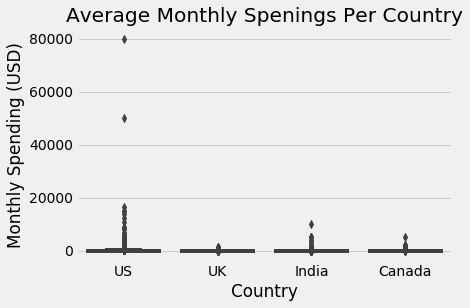

In [11]:
four_countries = spend_money[spend_money["CountryLive"].str.contains('United States of America|India|United Kingdom|Canada')]

import seaborn as sns
sns.boxplot(y="Monthly_Spending", x="CountryLive", data=four_countries)
plt.title("Average Monthly Spenings Per Country")
plt.ylabel("Monthly Spending (USD)")
plt.xlabel("Country")
plt.xticks(range(4),["US", "UK", "India", "Canada"])
plt.show()

From the box plot wa can see that the biggest outliers are in the US. To remove the outlier let's keep values under 20k.

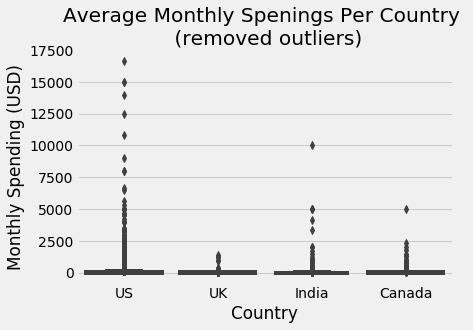

In [12]:
four_countries_clean = four_countries[four_countries["Monthly_Spending"] < 20000]

sns.boxplot(y="Monthly_Spending", x="CountryLive", data=four_countries_clean)
plt.title("Average Monthly Spenings Per Country \n (removed outliers)")
plt.ylabel("Monthly Spending (USD)")
plt.xlabel("Country")
plt.xticks(range(4),["US", "UK", "India", "Canada"])
plt.show()

In [13]:
four_countries_clean.groupby(["CountryLive"]).mean()["Monthly_Spending"][["United States of America", "India", "United Kingdom", "Canada"]]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Monthly_Spending, dtype: float64

## 3.2 Removing the Country Outliers
### 3.2.1 India
The chart and recomputed mean above removed the outliers and now possible new outliers are visible. Let's inspect the values in India that are above the Inda Cluster of 2500 USD.

In [14]:
india_outliers = four_countries_clean[(four_countries_clean["Monthly_Spending"] > 2500) & (four_countries_clean["CountryLive"] == "India")]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly_Spending
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,N

From the survey does not support the high values. Neither of the repondents attended any Bootcamp. The hight values might be a typo or the people confused it with the `StudentDeptOwe` field. Since there is no other way how to verify the answers, let's delete them.

In [15]:
four_countries_clean = four_countries_clean.drop(india_outliers.index)

### 3.2.2 USA
United States have also some long tail values. Let's examine all values that are above 6500 USD and possibly remove the values as well.

In [16]:
usa_outliers = four_countries_clean[(four_countries_clean["CountryLive"] ==  "United States of America") & (four_countries_clean["Monthly_Spending"] > 6500)]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly_Spending
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,NaN,United States of America,software development and IT,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,5d4889491d9d25a255e57fd1c0022458,585e8f8b9a838ef1abbe8c6f1891c048,40000.0,0.0,0.0,0.0,0.0,I haven't decided,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,work for a medium-sized company,0.0,"Quality Assurance Engineer, DevOps / SysAd...",in an office with other developers,English,"single, never married",9000.0,1.0,e7bebaabd4,2017-03-11 23:34:16,2017-03-11 23:31:17,2017-03-11 23:36:02,2017-03-11 23:34:21,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN

From the table above only 5 of the new coders have attended Bootcamps. Some of the students have been programming for less than 3 months and did not attend any bootcamp. It's unlike they would spend such amounts in such a short time. Let's remove thos who did not attend any bootcamp and are learning less than 3 months.

In [19]:
# removing the ones with no bootcamp
no_boot = four_countries_clean[(four_countries_clean["CountryLive"] == "United States of America") &
                                (four_countries_clean["Monthly_Spending"] > 6500) &
                                (four_countries_clean["AttendedBootcamp"] == 0.0)]

four_countries_clean = four_countries_clean.drop(no_boot.index)

In [20]:
# removing the ones with less than 3 mos of learning
less_3 = four_countries_clean[(four_countries_clean["CountryLive"] == "United States of America") &
                                (four_countries_clean["Monthly_Spending"] > 6500) &
                                (four_countries_clean["MonthsProgramming"] < 3)]

four_countries_clean = four_countries_clean.drop(less_3.index)

### 3.2.3 Canada
Also Canada has one outlier. Person who spends around 5k USD. Let's examine it.

In [21]:
canada_outliers = four_countries_clean[(four_countries_clean["Monthly_Spending"] > 4000) & (four_countries_clean["CountryLive"] == "Canada")]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly_Spending
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Looking at the Bootcamp that is now renamed as [Thinkful](https://www.thinkful.com) it is possilbe that this person had paid their tution in advance. Let's keep them in the Canada dataset. To visualy see the changes we've made, let's plot the final boxplot.

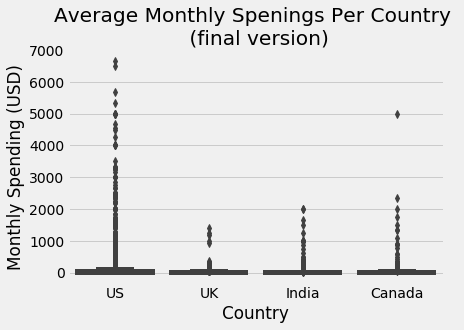

In [22]:
sns.boxplot(y="Monthly_Spending", x="CountryLive", data=four_countries_clean)
plt.title("Average Monthly Spenings Per Country \n (final version)")
plt.ylabel("Monthly Spending (USD)")
plt.xlabel("Country")
plt.xticks(range(4),["US", "UK", "India", "Canada"])
plt.show()

In [24]:
four_countries_clean.groupby(["CountryLive"]).mean()["Monthly_Spending"][["United States of America", "Canada", "India", "United Kingdom"]]

CountryLive
United States of America    147.063012
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
Name: Monthly_Spending, dtype: float64

## 4. Choosing Two Best Markets
Based on our findings we are definitelly choosing US for our advertising. They have the most learners and people are spending the most on this market. Let's decide what is the second market going to be. Our company monthly subscription is 59 USD. This eliminates UK as the average monthly spending is below our monthly fee. 

In [25]:
four_countries_clean["CountryLive"].value_counts(normalize=True) * 100

United States of America    74.961519
India                       11.723961
United Kingdom               7.157517
Canada                       6.157004
Name: CountryLive, dtype: float64

Canada has bigger amount of monthly spending but India has bigger market share. Let's compute market value to see how much money the markets are worth.
### 4.1 Canada Market Value

In [37]:
canada_market = four_countries_clean[four_countries_clean["CountryLive"] == "Canada"]["CountryLive"].value_counts()
canada_spend = four_countries_clean[four_countries_clean["CountryLive"] == "Canada"]["Monthly_Spending"].mean()

canada_market * canada_spend

Canada    27242.630637
Name: CountryLive, dtype: float64

### 4.2 India Market Value

In [38]:
india_market = four_countries_clean[four_countries_clean["CountryLive"] == "India"]["CountryLive"].value_counts()
india_spend = four_countries_clean[four_countries_clean["CountryLive"] == "India"]["Monthly_Spending"].mean()

india_market * india_spend

India    30051.754651
Name: CountryLive, dtype: float64

The possible market value of India is actually higher than Canadian market. **The two markets we can advertise are USA and India.** 